<a href="https://colab.research.google.com/github/Ferchisx/SignalProcessing/blob/main/TareaFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias y funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def señal(freq, sample):
  A = 1
  time = np.linspace(0, 1, sample)
  signal = A * np.sin(2 * np.pi * freq * time)
  return time, signal

#Inicialización de las señales y gráfica en el tiempo


In [3]:
freq = int(input("Frecuencia: "))
sample1 = int(input("Muestras señal 1: "))
sample2 = int(input("Muestras señal 2: "))

Frecuencia: 100
Muestras señal 1: 500
Muestras señal 2: 1000


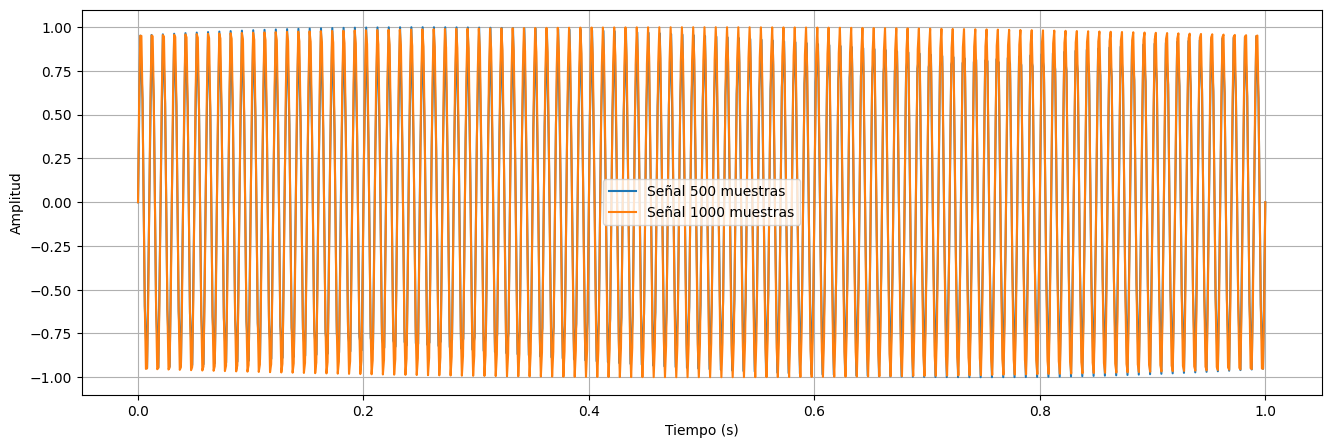

In [4]:
time1, signal1 = señal(freq, sample1)
time2, signal2 = señal(freq, sample2)

# Plot the signal
plt.figure(figsize=(16, 5))
plt.plot(time1, signal1, label=f'Señal {sample1} muestras')
plt.plot(time2, signal2, label=f'Señal {sample2} muestras')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()

#Transformada de Fourier

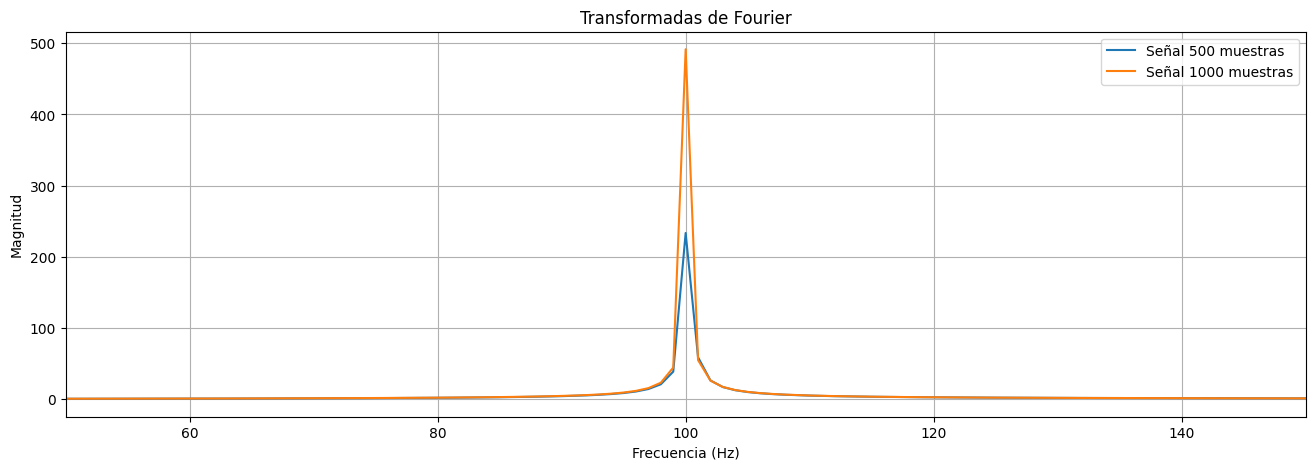

In [5]:
#Transformadas
trans_signal1 = np.fft.fft(signal1)
trans_signal2 = np.fft.fft(signal2)

#Puntos de Frecuencia
freq1 = np.fft.fftfreq(len(signal1), 1/sample1)
freq2 = np.fft.fftfreq(len(signal2), 1/sample2)

#Gráfica de los puntos positivos
plt.figure(figsize=(16, 5))
plt.plot(freq1[:len(freq1)//2], np.abs(trans_signal1[:len(trans_signal1)//2]), label=f'Señal {sample1} muestras')
plt.plot(freq2[:len(freq2)//2], np.abs(trans_signal2[:len(trans_signal2)//2]), label=f'Señal {sample2} muestras')
plt.title("Transformadas de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.xlim(freq-50,freq+50)
plt.ylabel("Magnitud")
plt.grid()
plt.legend()
plt.show()

#PSD

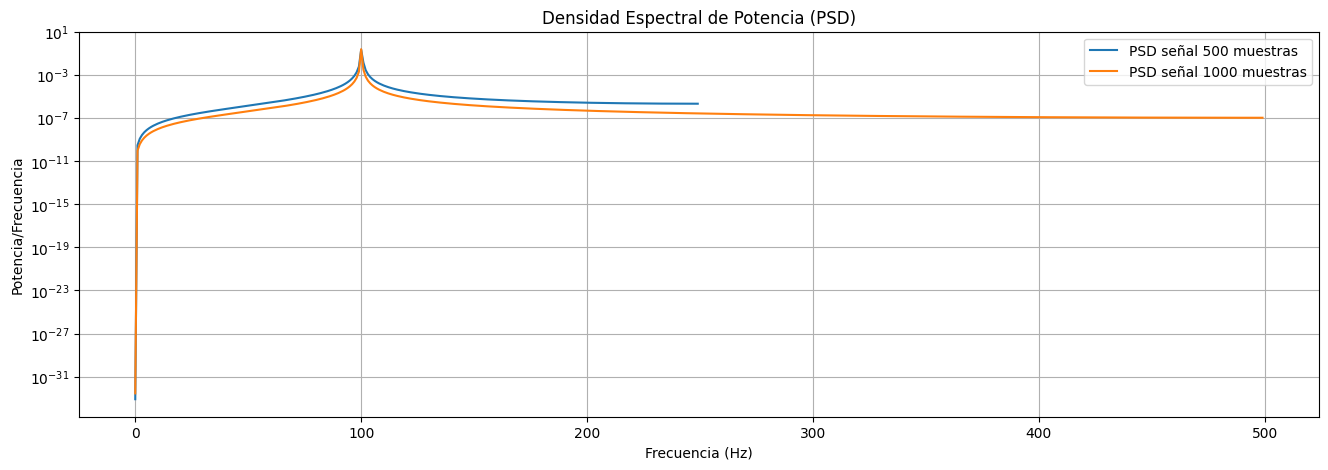

In [6]:
PSD1 = (np.abs(trans_signal1)**2) / (len(signal1) * sample1)
PSD2 = (np.abs(trans_signal2)**2) / (len(signal2) * sample2)

#Solo frecuencia positivas
pos_freq1 = freq1[:len(freq1)//2]
pos_psd1 = PSD1[:len(PSD1)//2]
pos_freq2 = freq2[:len(freq2)//2]
pos_psd2 = PSD2[:len(PSD2)//2]

#Gráfica PSD en semilogarítmico
plt.figure(figsize=(16, 5))
plt.semilogy(pos_freq1, pos_psd1, label=f'PSD señal {sample1} muestras')
plt.semilogy(pos_freq2, pos_psd2, label=f'PSD señal {sample2} muestras')
plt.title("Densidad Espectral de Potencia (PSD)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Potencia/Frecuencia")
plt.grid()
plt.legend()
plt.show()